Here is my notebook of a sample chess game using a 8x3 board. Each player is given 6 pieces across the left end/strip of the board. We will set the computer to the first player(white). The minmax recursive function will use a basic evalutation function, adding to the computers score for its pieces, and subtracting for blacks

In [ ]:
#pip install python-chess

In [ ]:
import chess
import numpy as np
import random
import functools
import time
import matplotlib.pyplot as plt

In [ ]:
# Create an empty board
board = chess.Board(None)  # no pieces

# Place 3 white pieces on the first row
board.set_piece_at(chess.A2, chess.Piece(chess.PAWN, chess.WHITE))
board.set_piece_at(chess.B2, chess.Piece(chess.PAWN, chess.WHITE))
board.set_piece_at(chess.C2, chess.Piece(chess.PAWN, chess.WHITE))

# Place 3 black pieces on the first row
board.set_piece_at(chess.A7, chess.Piece(chess.PAWN, chess.BLACK))
board.set_piece_at(chess.B7, chess.Piece(chess.PAWN, chess.BLACK))
board.set_piece_at(chess.C7, chess.Piece(chess.PAWN, chess.BLACK))


# Three offesnsive pieces white
board.set_piece_at(chess.A1, chess.Piece(chess.QUEEN, chess.WHITE))
board.set_piece_at(chess.B1, chess.Piece(chess.KING, chess.WHITE))
board.set_piece_at(chess.C1, chess.Piece(chess.ROOK, chess.WHITE))

# Three offesnive pieces black
board.set_piece_at(chess.A8, chess.Piece(chess.QUEEN, chess.BLACK))
board.set_piece_at(chess.B8, chess.Piece(chess.KING, chess.BLACK))
board.set_piece_at(chess.C8, chess.Piece(chess.ROOK, chess.BLACK))


8 Row 3 Column Board


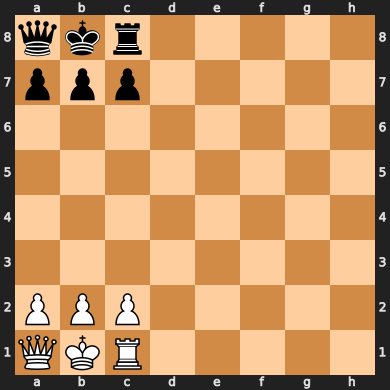

In [ ]:
print("8 Row 3 Column Board")
board

In [ ]:
# Create min max algorithm for computer to make the best move
def evaluate_board(board):
  """
  Simple evaluation function:
  Assigns point values to pieces and sums the values for each player.
  Positive values favor White, negative values favor Black.
  """
  piece_values = {
      chess.PAWN: 1, # Least Important
      chess.ROOK: 5, # More Important
      chess.QUEEN: 12, # Very Important
      chess.KING: 1000000, # King value is for checkmate, not material(Not to capture)
  }
  evaluation = 0
  for square in chess.SQUARES:
    piece = board.piece_at(square)
    if piece:
      value = piece_values.get(piece.piece_type, 0)
      # Add score for white(the computer)
      if piece.color == chess.WHITE:
        evaluation += value
      # Subtract for blacks pieces
      else:
        evaluation -= value
  return evaluation

# @functools.cache
def min_max(board, depth, maximizing_player):
  # -- Base case
  if depth == 0 or board.is_game_over():
    return evaluate_board(board)

  # Max player case
  if maximizing_player:
    # loop through all possible moves to recursievely call upon
    max_eval = float('-inf')
    for move in board.legal_moves:
      board.push(move)
      eval = min_max(board, depth - 1, False)
      board.pop()
      max_eval = max(max_eval, eval)
    return max_eval

  # Min player case
  else:
    min_eval = float('inf')
    for move in board.legal_moves:
      board.push(move)
      eval = min_max(board, depth - 1, True)
      board.pop()
      min_eval = min(min_eval, eval)
    return min_eval

DEPTH = 4
# Create function to actually make the move utilizing the min_max algorithm
def make_move(board, valid_squares):
  best_move = None
  best_eval = float('-inf')
  # Filter legal moves to stay within valid_squares
  possible_moves = [move for move in board.legal_moves if move.from_square in valid_squares and move.to_square in valid_squares]

  for move in possible_moves:
    board.push(move)
    eval = min_max(board, DEPTH, False)
    board.pop()
    if eval > best_eval:
      best_eval = eval
      best_move = move
  return best_move

Current board:


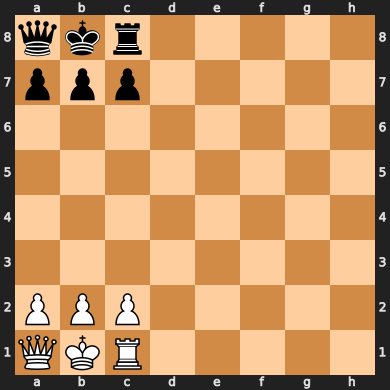

White plays: b2b3 (AI time: 10.515s)
---------------------------------------------------------

Current board:


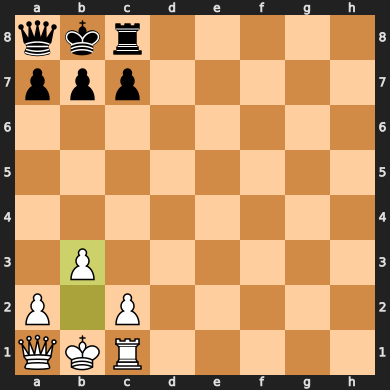

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['c7c6', 'b7b6', 'a7a6', 'c7c5', 'b7b5', 'a7a5']
Your move: a7a5
---------------------------------------------------------

Current board:


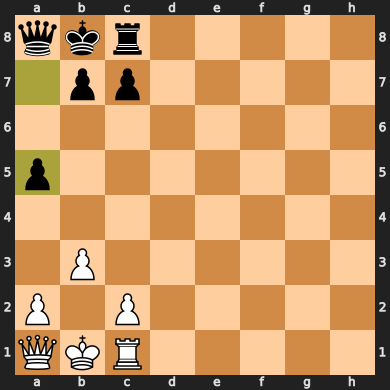

White plays: a1c3 (AI time: 29.865s)
---------------------------------------------------------

Current board:


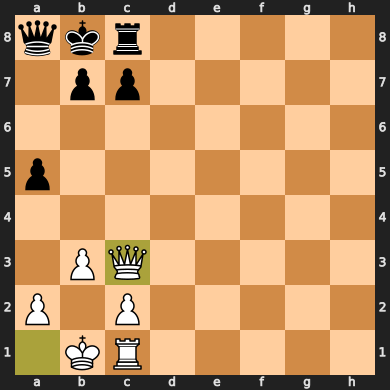

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['b8a7', 'a8a7', 'a8a6', 'c7c6', 'b7b6', 'a5a4', 'c7c5', 'b7b5']
Your move: a8a6
---------------------------------------------------------

Current board:


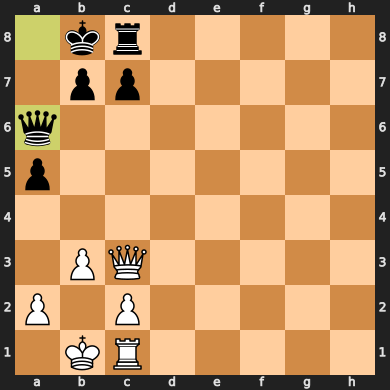

White plays: c3c5 (AI time: 216.460s)
---------------------------------------------------------

Current board:


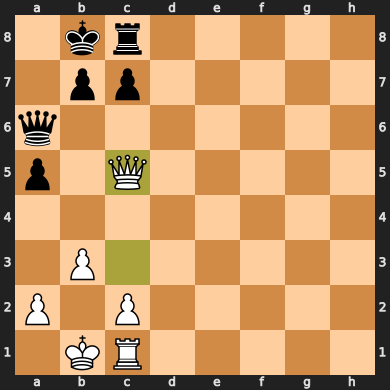

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['b8a8', 'a6a8', 'a6a7', 'a6c6', 'a6b6', 'a6b5', 'a6c4', 'c7c6', 'b7b6', 'a5a4', 'b7b5']
Your move: a6b5
---------------------------------------------------------

Current board:


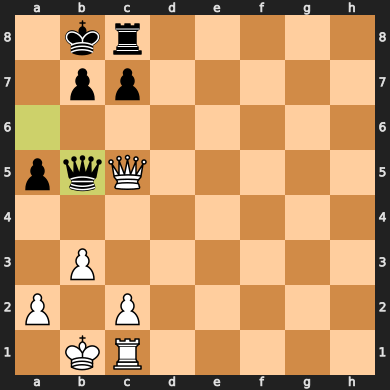

White plays: c5b5 (AI time: 240.256s)
---------------------------------------------------------

Current board:


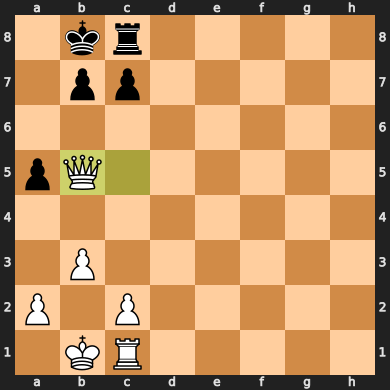

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['b8a8', 'b8a7', 'c7c6', 'b7b6', 'a5a4', 'c7c5']
Your move: c7c6
---------------------------------------------------------

Current board:


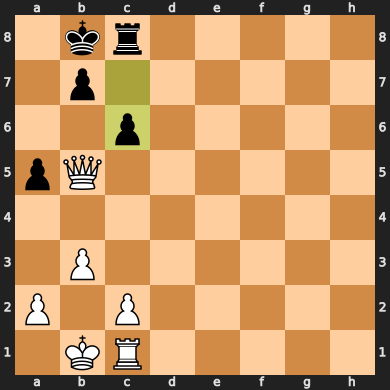

White plays: b5a5 (AI time: 69.744s)
---------------------------------------------------------

Current board:


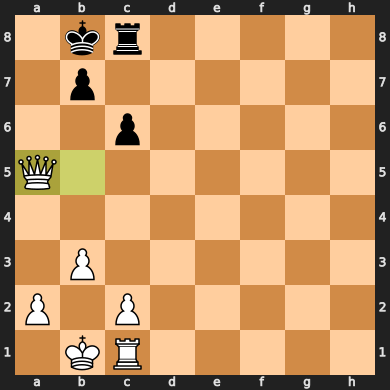

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['c8c7', 'b7b6', 'c6c5', 'b7b5']
Your move: b7b6
---------------------------------------------------------

Current board:


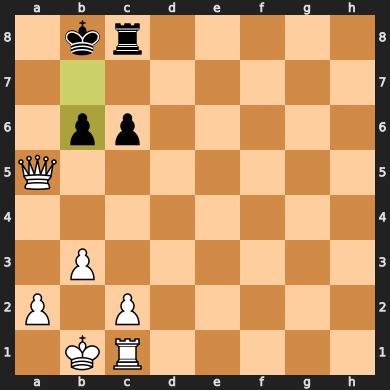

White plays: a5b6 (AI time: 50.059s)
---------------------------------------------------------

Current board:


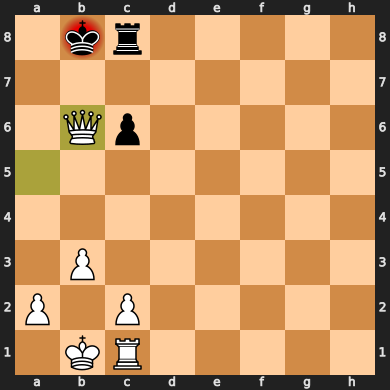

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['b8a8']
Your move: b8a8
---------------------------------------------------------

Current board:


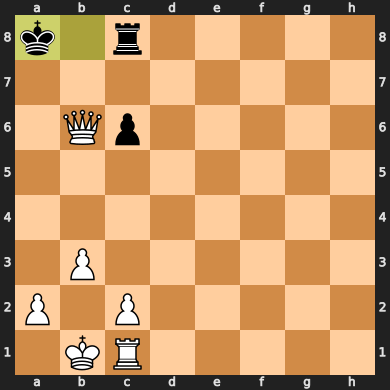

White plays: b6a6 (AI time: 27.609s)
---------------------------------------------------------

Current board:


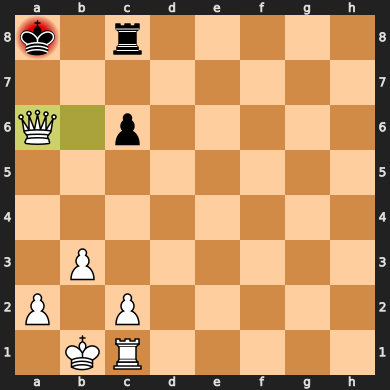

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['a8b8']
Your move: a8b8
---------------------------------------------------------

Current board:


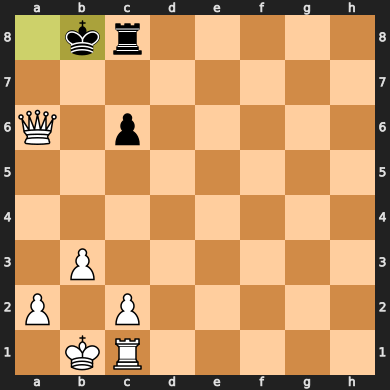

White plays: a6b6 (AI time: 29.987s)
---------------------------------------------------------

Current board:


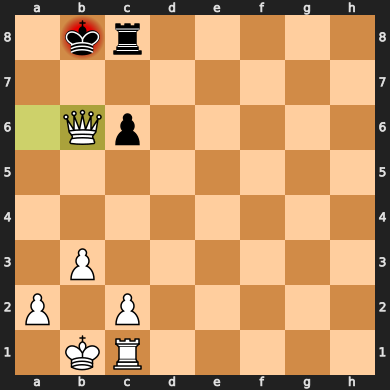

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['b8a8']
Your move: b8a8
---------------------------------------------------------

Current board:


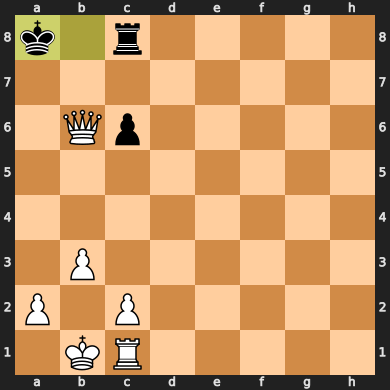

White plays: b6a6 (AI time: 27.944s)
---------------------------------------------------------

Current board:


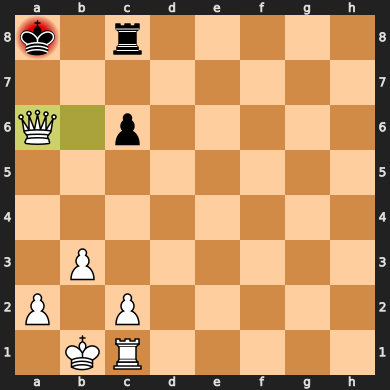

Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.
Legal moves: ['a8b8']
Your move: quit
You chose to quit the game. Exiting...

Final board:


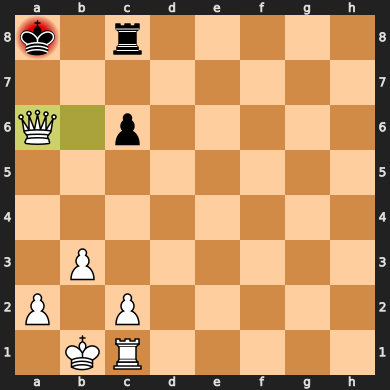

Game result: Game quit by user.


In [ ]:
quit_game = False  # flag to break outer loop cleanly
valid_squares = {chess.square(file, rank) for file in range(0, 3) for rank in range(0, 8)}
ai_times = []

while not board.is_game_over():
    print("Current board:")
    display(board)

    if board.turn == chess.WHITE:  # Computer (AI)
        legal_moves = [
            m for m in board.legal_moves
            if (m.from_square in valid_squares and m.to_square in valid_squares)
        ]
        if not legal_moves:
            print("White has no legal moves. Game over.")
            break

        move = make_move(board, valid_squares)

        start = time.time()
        move = make_move(board, valid_squares)   # Your minimax function
        end = time.time()
        ai_times.append(end - start)


        print(f"White plays: {move.uci()} (AI time: {ai_times[-1]:.3f}s)")
        print("---------------------------------------------------------\n")
        board.push(move)

    else:  # Human (Black)
        legal_moves = [
            m for m in board.legal_moves
            if (m.from_square in valid_squares and m.to_square in valid_squares)
        ]

        if not legal_moves:
            print("Black has no legal moves. Game over.")
            break

        print("Your turn! Enter a move in UCI (e.g., a7a6). Type 'quit' to stop.")
        print("Legal moves:", [m.uci() for m in legal_moves])

        while True:
            user_input = input("Your move: ").strip().lower()

            # --- Quit logic ---
            if user_input == "quit":
                print("You chose to quit the game. Exiting...")
                quit_game = True
                break

            # --- Try to parse a chess move ---
            try:
                move = chess.Move.from_uci(user_input)

                if move in legal_moves:
                    board.push(move)
                    print("---------------------------------------------------------\n")
                    break
                else:
                    print("Illegal move. Legal options:", [m.uci() for m in legal_moves])

            except ValueError:
                print("Invalid format. Try again. Or type 'quit'.")
                print("Legal moves:", [m.uci() for m in legal_moves])

        if quit_game:
            break

print("\nFinal board:")
display(board)
print("Game result:", board.result() if not quit_game else "Game quit by user.")


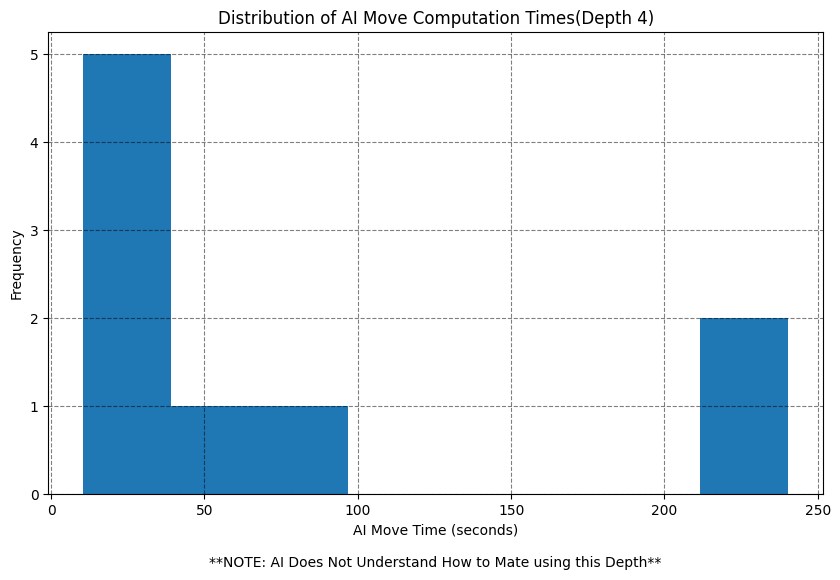

In [ ]:
if ai_times:
    plt.figure(figsize=(10, 6))
    plt.hist(ai_times, bins=8)
    plt.xlabel(f"AI Move Time (seconds)\n\n**NOTE: AI Does Not Understand How to Mate using this Depth**")
    plt.ylabel("Frequency")
    plt.title("Distribution of AI Move Computation Times(Depth 4)")
    plt.grid(linestyle = '--', alpha=0.5, color='k')
    plt.show()
else:
    print("No AI moves were recorded.")


